Problem: Build a classification model from scratch with `sklearn.neural_network.MLPClassifier`, using the `Fashion-MNIST` dataset

In [ ]:
# !pip install tensorflow
# !pip install scikit-learn
# !pip install matplotlib
# !pip install seaborn
# !pip install joblib

1. load dataset

In [2]:
# 1. load dataset
from tensorflow.keras.datasets import fashion_mnist
import numpy as np

# load fashion_mnist dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# print dataset shape

print("train images shape: ", X_train.shape, y_train.shape)
print("test images shape: ", X_test.shape, y_test.shape)

train images shape:  (60000, 28, 28) (60000,)
test images shape:  (10000, 28, 28) (10000,)


2. flatten and scale

In [4]:
# 2. flatten and scale
# flatten: each 28×28 image into a 784-length vector
X_train = X_train.reshape(60000, 784).astype("float32")
X_test = X_test.reshape(10000, 784).astype("float32")

# scale: divide by 255
X_train /= 255.0
X_test /= 255.0

print("after preprocessing:", X_train.shape, X_test.shape)
print("pixel range:", X_train.min(), "to", X_train.max())

after preprocessing: (60000, 784) (10000, 784)
pixel range: 0.0 to 1.0


3. scaling with `StandardScaler`

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

4. MLP Classifier
- 2 hidden layers with 128 and 64 neurons

- ReLU activation

- Adam optimizer

- max 20 epochs (iterations over training data)

In [14]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation = "relu",
    solver='adam',
    max_iter=20,
    verbose=True,
    random_state=42
)

5. train 

In [15]:
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.47483930
Iteration 2, loss = 0.33070057
Iteration 3, loss = 0.29121495
Iteration 4, loss = 0.26769893
Iteration 5, loss = 0.24322082
Iteration 6, loss = 0.22757832
Iteration 7, loss = 0.21040895
Iteration 8, loss = 0.20029836
Iteration 9, loss = 0.18661640
Iteration 10, loss = 0.17628262
Iteration 11, loss = 0.16442009
Iteration 12, loss = 0.15488035
Iteration 13, loss = 0.14881053
Iteration 14, loss = 0.13699440
Iteration 15, loss = 0.12771580
Iteration 16, loss = 0.12013826
Iteration 17, loss = 0.11975496
Iteration 18, loss = 0.11338272
Iteration 19, loss = 0.10445595
Iteration 20, loss = 0.10056922


/home/mikey/Desktop/maab_ml/.venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(128, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,20
,shuffle,True
,random_state,42


6. evaluate model performance

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# predictions
y_pred = mlp.predict(X_test)

# accuracy
acc = accuracy_score(y_test, y_pred)
print("** Test accuracy **:", acc)

# detailed report
print("\n** Classification report **:\n", classification_report(y_test, y_pred))

# confusion matrix
print("\n** Confusion matrix **:\n", confusion_matrix(y_test, y_pred))

** Test accuracy **: 0.8809

** Classification report **:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.81      0.80      1000
           3       0.93      0.81      0.87      1000
           4       0.79      0.83      0.81      1000
           5       0.97      0.95      0.96      1000
           6       0.71      0.73      0.72      1000
           7       0.94      0.97      0.95      1000
           8       0.96      0.97      0.96      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000


** Confusion matrix **:
 [[832   3  20   9   6   0 119   0  11   0]
 [  8 964   1  16   5   1   5   0   0   0]
 [ 16   1 814   7  78   2  80   0   2   0]
 [ 57   4  29 810  59   1  

7. plot confusion matrix

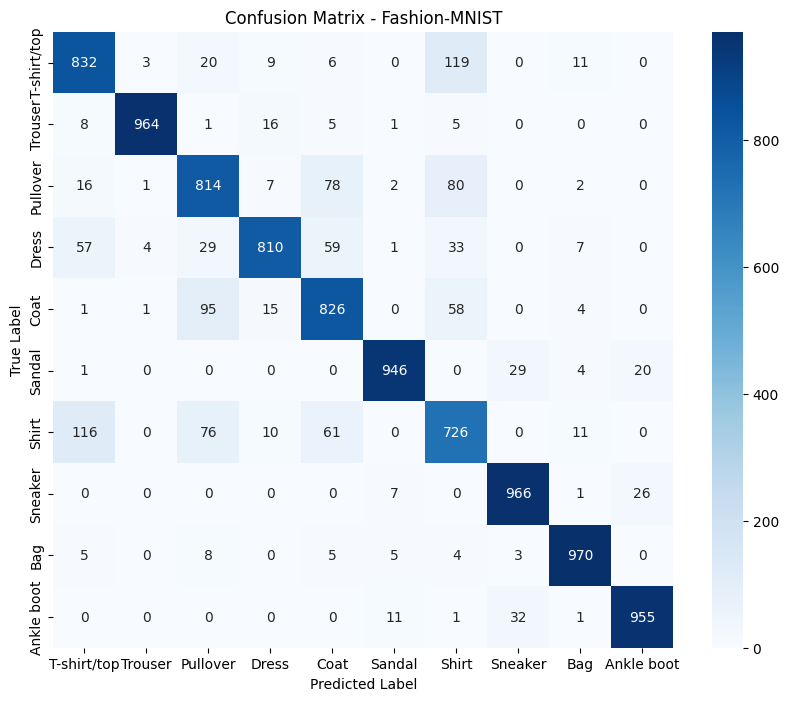

In [22]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fashion-MNIST dataset class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# compute confusion matrix (again)
cm = confusion_matrix(y_test, y_pred)

# plot confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Fashion-MNIST")
plt.show()



8. save/load model

In [26]:
import joblib

joblib.dump(mlp, "fashion_mnist_mlp.pkl")

# load
# mlp = joblib.load("fashion_mnist_mlp.pkl")

['fashion_mnist_mlp.pkl']

## Inference

1. load image

In [34]:
from PIL import Image
import numpy as np

# load and preprocess single image
img = Image.open("./image2.png").convert("L")  # convert to grayscale
img = img.resize((28, 28))  # resize to 28x28
img_array = np.array(img)


# invert if background white
img_array = 255 - img_array

# flatten and style
img_array = img_array.reshape(1, -1).astype("float32") / 255.0

# apply StandartScaler
img_array = scaler.transform(img_array)


2. run inference

pullover

<img src="./image2.png"
    width=250 style="object-fit: contain"
/>

In [35]:
pred = mlp.predict(img_array)[0]
print("predicted class:")
class_names[pred]

predicted class:


'Pullover'

3. see probabilities

In [39]:
probs = mlp.predict_proba(img_array)[0]
for i, p in enumerate(probs):
    print(f"{class_names[i]}: {p:.3f}")

T-shirt/top: 0.008
Trouser: 0.003
Pullover: 0.580
Dress: 0.003
Coat: 0.133
Sandal: 0.000
Shirt: 0.231
Sneaker: 0.000
Bag: 0.040
Ankle boot: 0.001
